In [36]:
import copy
import json
import os
import numpy as np
import kernel
import configuration
import calibration
from matplotlib import pyplot as plt

In [37]:
def float_to_str(nr: float):
    nr = float(nr)
    return str(nr).replace('.', '')

def min_sigma_of_axis(data, axis):
    return data[np.where(data[:, axis] == np.nanmin(data[:, axis]))][0]

def make_header(path, data, case):
    print(f'Minimize values in {case} from:')
    print(path)
    print(f'{"sigma":10}|{"mean force":10}|{"var force":10}|{"mean cos":10}|{"var cos":10}|{"energy":10}|')
    for i in range(1, 6):
        line = ""
        for val in min_sigma_of_axis(data, i):
            line += f'{val:10.6f}|'
        print(line)    
    
def plot4(data: np.array, max_n, title=""):
    fig, axs = plt.subplots(3, 2, figsize = (20, 12))
    fig.suptitle(title, fontsize=20)
    titles = ["force mean", "force variance", "mean $cos$", "var $cos$", "energy difference"]
    
    for i, ax in enumerate(axs.flatten()):
        ax.scatter(data[:max_n, 0], data[:max_n, i+1])
        ax.grid()
        ax.set(xlabel="$\sigma$", title=titles[i])
        if i in (0, 1):
            ax.set_yscale('log')
        if i == 4:
            break
            

def analyze(n: int, min_sigma, max_sigma, modi, stepsize, max_n=-1):
    print(f'{"steps":10}={n:5}')
    print(f'{"min sigma":10}={min_sigma:5}')
    print(f'{"max sigma":10}={max_sigma:5}')
    print(f'{"grid":10}={abs(min_sigma - max_sigma)/n:5}')
    print(f'{"configs":10}={1000 / stepsize:5}')
    print(f'{"modi":10}={modi:5}\n')
    
    fit_path = f'test_data/test_parameters/single_config/fit_{n}_({float_to_str(min_sigma)}-{float_to_str(max_sigma)})_m{modi}_s{stepsize}.dat'
    fit = np.loadtxt(fit_path)
    make_header(fit_path, fit, 'fit')
    print("\n")

    pred_path = f'test_data/test_parameters/single_config/prediction_{n}_({float_to_str(min_sigma)}-{float_to_str(max_sigma)})_m{modi}_s{stepsize}.dat'
    prediction = np.loadtxt(pred_path)
    make_header(pred_path, prediction, 'prediction')
        
    plot4(fit, max_n, "Fitting")
    plot4(prediction, max_n, "Prediction")

# Analyzing the influence of $\sigma$ in correspondence to nr of modi
## 10 modi

steps     =   25
min sigma =    0
max sigma =   10
grid      =  0.4
configs   = 10.0
modi      =   10

Minimize values in fit from:
test_data/test_parameters/single_config/fit_25_(00-100)_m10_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  7.083336|  0.474746|  1.387334|  0.917142|  0.022892|  0.004079|
  2.083341|  0.712368|  0.659335|  0.756060|  0.164388|  0.004063|
  0.000010|  1.167267|  2.437140|  0.354695|  0.322066|  0.000000|
  7.083336|  0.474746|  1.387334|  0.917142|  0.022892|  0.004079|
  0.416676|  1.333680| 19.198600|  0.676611|  0.144085|  0.000000|


Minimize values in prediction from:
test_data/test_parameters/single_config/prediction_25_(00-100)_m10_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  7.083336|  0.376273|  0.063871|  0.920235|  0.016115|  0.003309|
  0.000010|  1.000000|  0.000000|       nan|       nan|  0.002355|
  0.833342|781.915820|3898992.433026|  0.067478|  0.328799|  0.121394|
  7.500002|

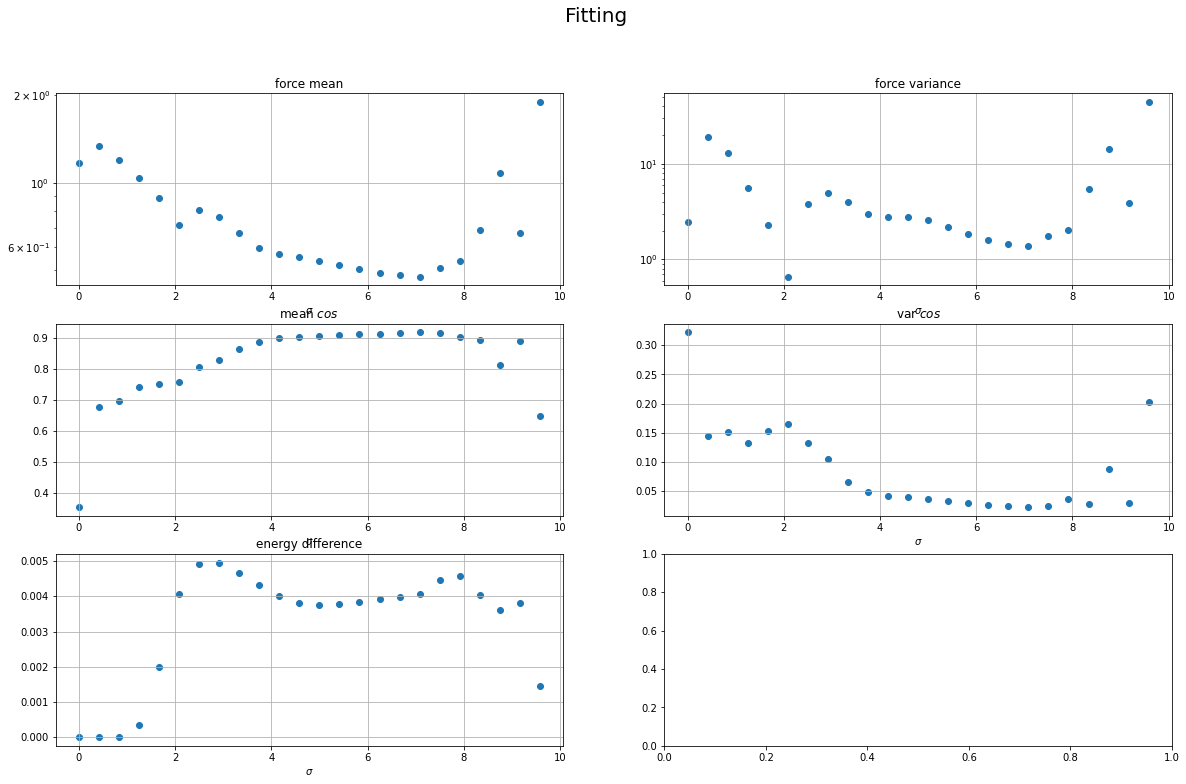

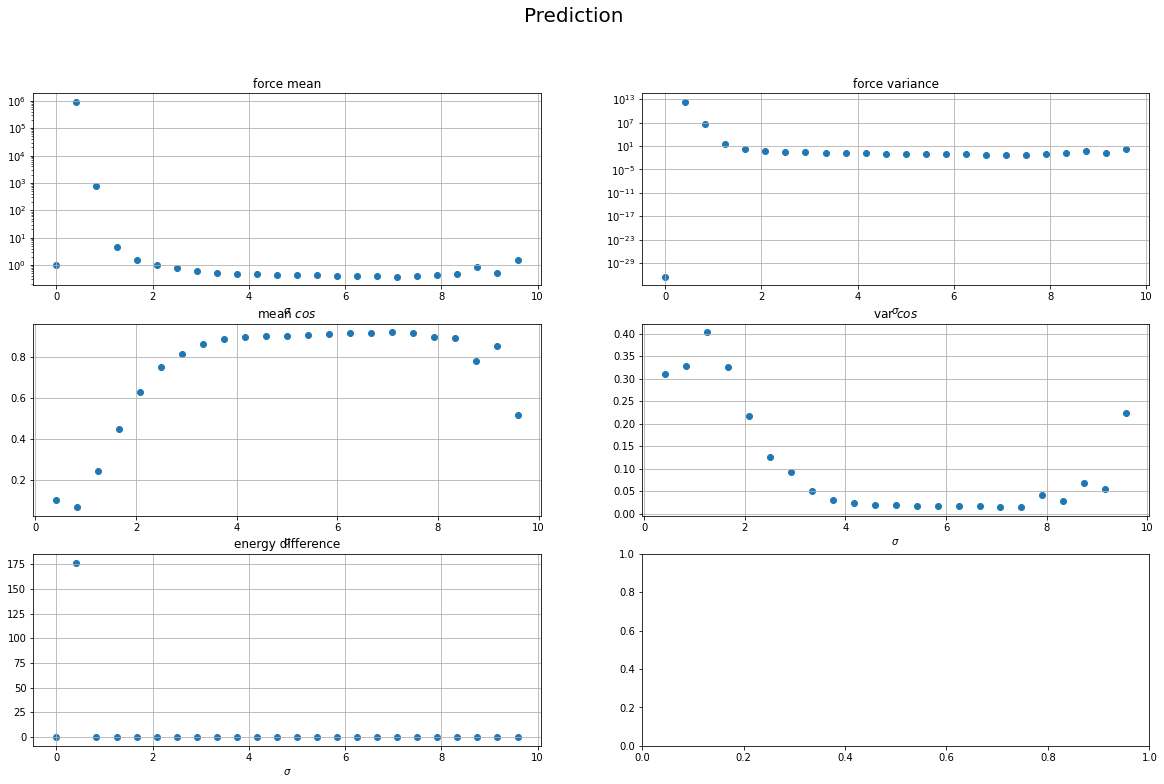

In [38]:
analyze(25, 0, 10, 10, 100)

In [ ]:
analyze(10, 0, 1, 10, 100)

steps     =   10
min sigma =    0
max sigma =    1
grid      =  0.1
configs   = 10.0
modi      =   10

Minimize values in fit from:
test_data/test_parameters/single_config/fit_10_(00-10)_m10_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  0.111120|  1.000000|  0.000000|  0.307274|  0.280703|  0.000000|
  0.111120|  1.000000|  0.000000|  0.307274|  0.280703|  0.000000|
  0.111120|  1.000000|  0.000000|  0.307274|  0.280703|  0.000000|
  1.000000|  1.118335|  8.997468|  0.723572|  0.119685|  0.000011|
  0.111120|  1.000000|  0.000000|  0.307274|  0.280703|  0.000000|


Minimize values in prediction from:
test_data/test_parameters/single_config/prediction_10_(00-10)_m10_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  0.000010|  1.000000|  0.000000|       nan|       nan|  0.002355|
  0.000010|  1.000000|  0.000000|       nan|       nan|  0.002355|
  0.333340|3070047.240816|43631073427522.507812| -0.002548|  0.336071|1267.499540|
 

## modi = 2

In [ ]:
analyze(20, 0, 10, 2, 100)

## modi = 4

In [ ]:
analyze(20, 0, 10, 4, 100)

## modi = 6

In [ ]:
analyze(20, 0, 10, 6, 100)

## modi = 8

In [ ]:
analyze(20, 0, 10, 8, 100)

## modi = 12

In [ ]:
analyze(20, 0, 10, 12, 100)

## modi = 14

In [ ]:
analyze(20, 0, 10, 12, 100)

# Analyzing the influence of the nr of configurations
## Learning on 20 configurations

In [ ]:
analyze(20, 0, 12, 10, 50)

## Learning on 40 configurations

In [ ]:
analyze(20, 0, 12, 10, 25)

## Learning on 7 configurations

In [ ]:
analyze(20, 0, 10, 10, 150)